# Lab 9 => Clustring

## Import Lib

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pickle import dump
from pickle import load

## Import Data

In [229]:
# Load the dataset
file_path = 'force2020_data_unsupervised_learning.csv'
data = pd.read_csv(file_path)

## Data Explore

In [231]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [233]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [235]:
data.shape

(18270, 6)

In [237]:
data.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [239]:
data.dropna(inplace=True)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12202 entries, 4238 to 16439
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      12202 non-null  float64
 1   GR        12202 non-null  float64
 2   DEPTH_MD  12202 non-null  float64
 3   NPHI      12202 non-null  float64
 4   PEF       12202 non-null  float64
 5   DTC       12202 non-null  float64
dtypes: float64(6)
memory usage: 667.3 KB


In [243]:
data.duplicated().sum()

0

In [245]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


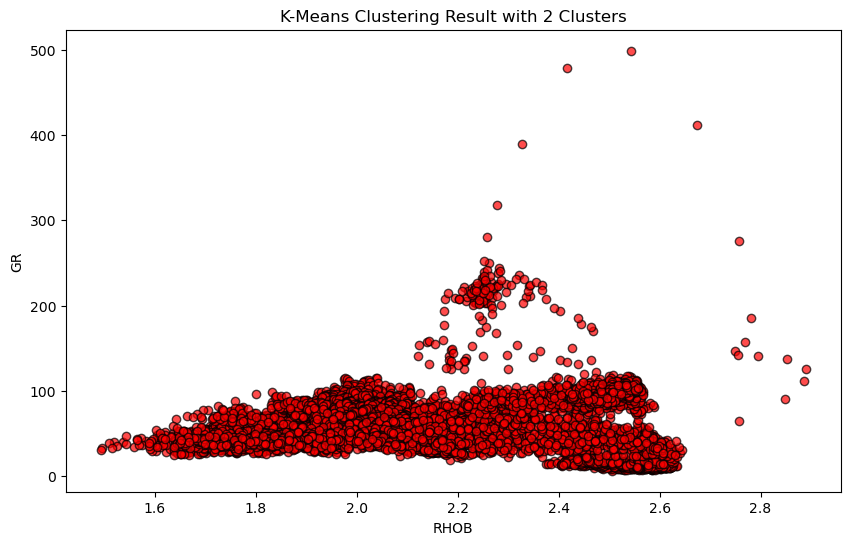

In [247]:
# Choose two features for visualization (e.g., 'RHOB' and 'GR')
plt.figure(figsize=(10, 6))
plt.scatter(data['RHOB'], data['GR'],c='red',  alpha=0.7, edgecolor='k')
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title('K-Means Clustering Result with 2 Clusters')
plt.show()

## Standardize Data

In [249]:
# Re-initialize scaler and standardize the cleaned dataset
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
data_standardized_df = pd.DataFrame(data_standardized, columns=data.columns)

In [251]:
data_standardized_df.columns.tolist()

['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']

In [253]:
data_standardized_df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
1,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
2,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
3,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297
4,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808


In [255]:
# Display the descriptive statistics of the standardized data
data_standardized_df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,1.220200e+04,1.220200e+04,12202.000000,1.220200e+04,1.220200e+04,1.220200e+04
mean,-5.217557e-16,7.453653e-17,0.000000,-1.490731e-16,2.236096e-16,-6.708287e-16
std,1.000041e+00,1.000041e+00,1.000041,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.609607e+00,-1.841459e+00,-1.731605,-2.705419e+00,-1.533222e+00,-2.161119e+00
25%,-6.605409e-01,-6.173961e-01,-0.866076,-7.239543e-01,-7.062589e-01,-1.034210e+00
50%,-3.601669e-01,5.459496e-02,-0.000547,3.758510e-01,-3.011687e-01,5.615503e-01
75%,9.535356e-01,5.509066e-01,0.866118,7.131280e-01,4.260700e-01,8.170400e-01
max,2.939426e+00,1.464037e+01,1.731647,2.770744e+00,7.218123e+00,1.398372e+00


## Elbow Teqnuique

In [257]:
def find_optimal_clusters(data_standardized_df, max_clusters=10):
    # Initialize a list to store inertia values for each cluster count
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data_standardized_df)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title("Elbow Method for Optimal Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.xticks(range(1, max_clusters + 1))
    plt.grid()
    plt.show()

    return inertia

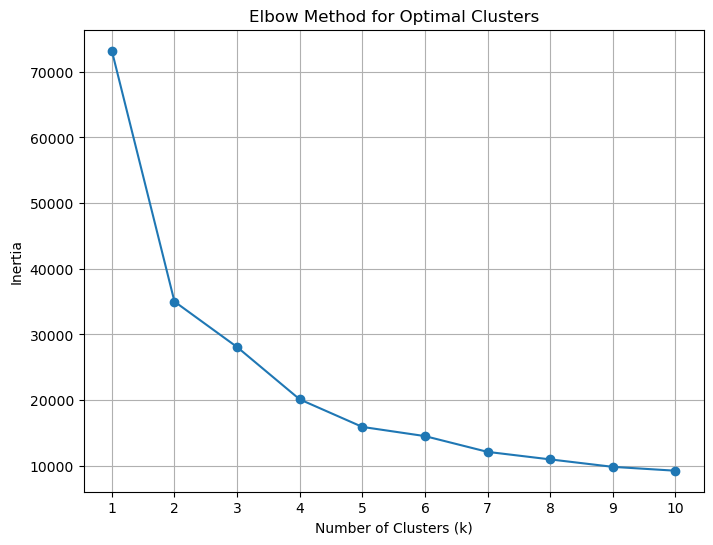

In [259]:
# Run the function and plot the Elbow Method
inertia_values = find_optimal_clusters(data_standardized, max_clusters=10)

## Silhouette Technique

In [261]:
def calculate_silhouette_scores(data, max_clusters=10):
    """
    Calculate silhouette scores for a range of cluster numbers.

    Parameters:
    - data: standardized dataset (numpy array or DataFrame)
    - max_clusters: maximum number of clusters to test

    Returns:
    - silhouette_scores: list of silhouette scores for each number of clusters
    """
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)  # Silhouette score needs at least 2 clusters

    for k in cluster_range:
        model = KMeans(n_clusters=k, random_state=0)
        labels = model.fit_predict(data_standardized_df)
        score = silhouette_score(data_standardized_df, labels)
        silhouette_scores.append(score)

    # Plot the silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title("Silhouette Scores for Different Numbers of Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

    return silhouette_scores

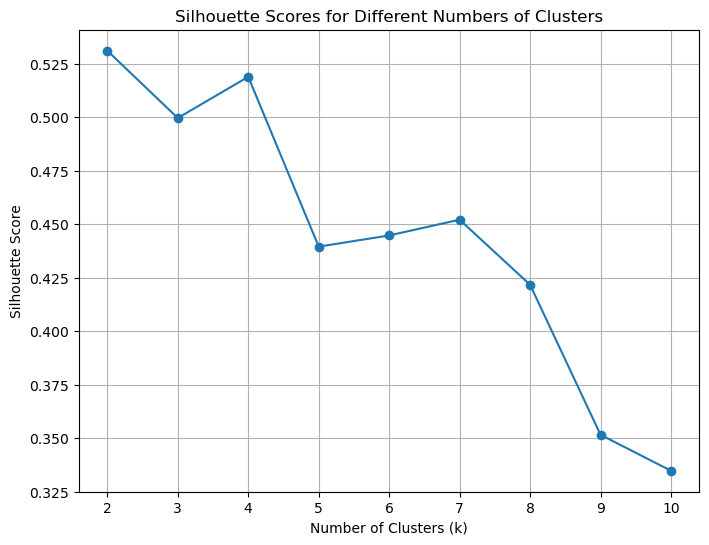

In [263]:
# Calculate and plot silhouette scores
silhouette_scores = calculate_silhouette_scores(data_standardized, max_clusters=10)


## K=2

In [265]:
reault_data=data.copy()

In [267]:
# Apply K-Means with 2 clusters
kmeans_2_clusters = KMeans(n_clusters=2, random_state=0)
reault_data['Cluster'] = kmeans_2_clusters.fit_predict(data_standardized_df)

In [271]:
reault_data.Cluster.value_counts()

Cluster
0    8311
1    3891
Name: count, dtype: int64

In [273]:
reault_data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,0


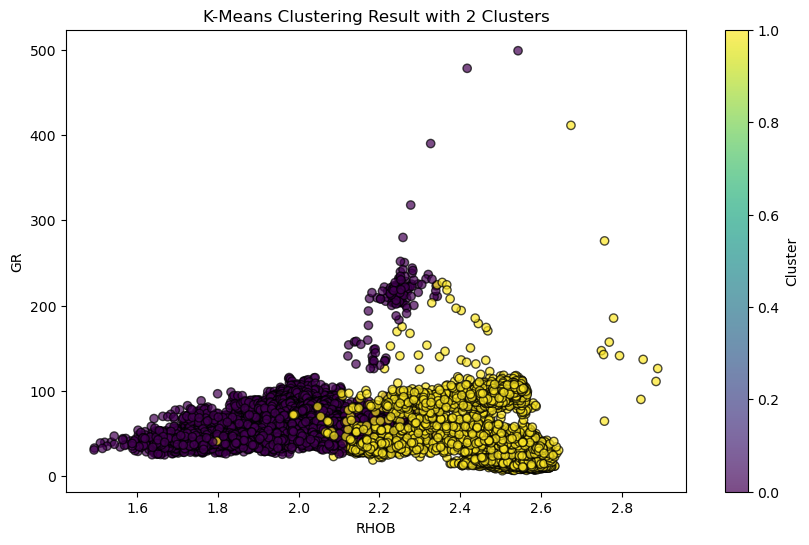

In [275]:
# Choose two features for visualization (e.g., 'RHOB' and 'GR')
plt.figure(figsize=(10, 6))
plt.scatter(reault_data['RHOB'], reault_data['GR'], c=reault_data['Cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Cluster')
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title('K-Means Clustering Result with 2 Clusters')
plt.show()


## K=4

In [277]:
kmeans_4_clusters = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans_4_clusters.fit_predict(data_standardized_df)

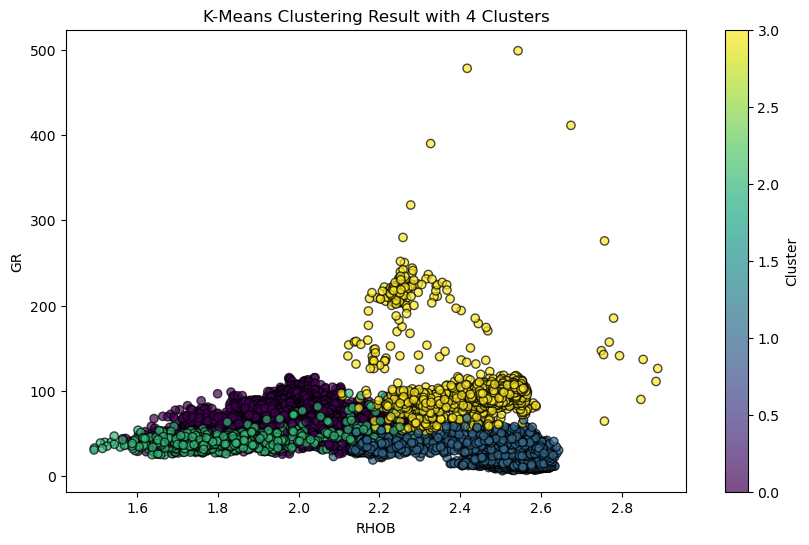

In [279]:
plt.figure(figsize=(10, 6))
plt.scatter(data['RHOB'], data['GR'], c=data['Cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Cluster')
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title('K-Means Clustering Result with 4 Clusters')
plt.show()


## Save Model And Predicate

In [281]:
filename='finalized_model.sav'
dump(kmeans_4_clusters,open(filename,'wb'))

In [283]:
# إنشاء بيانات اختبار جديدة
test_data = pd.DataFrame({
    'RHOB': [1.88, 1.89, 1.87],
    'GR': [75.0, 76.0, 74.0],
    'DEPTH_MD': [495.5, 495.6, 495.7],
    'NPHI': [495.5, 495.6, 495.7],  # قيم مفقودة كما في البيانات الأصلية
    'PEF': [25.0, 26.0, 24.0],
    'DTC': [159.0, 158.0, 160.0]
})

In [285]:
print("بيانات الاختبار:")
print(test_data)

بيانات الاختبار:
   RHOB    GR  DEPTH_MD   NPHI   PEF    DTC
0  1.88  75.0     495.5  495.5  25.0  159.0
1  1.89  76.0     495.6  495.6  26.0  158.0
2  1.87  74.0     495.7  495.7  24.0  160.0


In [287]:
sc_data=scaler.transform(test_data)
sc_data_df = pd.DataFrame(sc_data, columns=test_data.columns)

In [295]:
model=load(open(filename,'rb'))

In [297]:
predictions = model.predict(sc_data_df)
predictions

array([2, 2, 2])

In [299]:
# إضافة النتائج إلى بيانات الاختبار
test_data['Cluster'] = predictions

print("بيانات الاختبار مع التنبؤات:")
print(test_data)

بيانات الاختبار مع التنبؤات:
   RHOB    GR  DEPTH_MD   NPHI   PEF    DTC  Cluster
0  1.88  75.0     495.5  495.5  25.0  159.0        2
1  1.89  76.0     495.6  495.6  26.0  158.0        2
2  1.87  74.0     495.7  495.7  24.0  160.0        2
